In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import csv
import re
import numpy as np
import re 
import pylab as pl


In [93]:
# ax = sns.distplot(df)
reviews_file = 'GMFbiglr50_0.1-30000_loss.csv'
# reviews = pd.read_csv(reviews_file, header=0)
count = 0
iter = []
iter_direct = []
iter_mid = []
iter_inverse = []
direct = []
mid = []
inverse = []
label_list = []
loss_list = []
# filter_line = []
with open(reviews_file) as file:

     for line in file:
        # print(line)

        # if not(count == 0):
        splitLine = line.split('\t')
        iter_num = int(splitLine[0])
        if (iter_num > 8000):
            break
        direct_loss = float(splitLine[1])
        mid_loss = float(splitLine[2])
        inverse_loss = float(splitLine[3])
        # print(direct_loss, mid_loss, inverse_loss)
        if (direct_loss < mid_loss and direct_loss < inverse_loss):
            loss_list.append(direct_loss)
            direct.append(direct_loss)
            iter_direct.append(iter_num)
            label_list.append(0)
        elif (inverse_loss < mid_loss):
            loss_list.append(inverse_loss)
            inverse.append(inverse_loss)
            iter_inverse.append(iter_num)
            label_list.append(2)
        else:
            
            loss_list.append(mid_loss)
            mid.append(mid_loss)
            iter_mid.append(iter_num)
            label_list.append(1)



        iter.append(iter_num)
        # print(posWeight)
        # direct.append(direct_loss)
        # mid.append(mid_loss)
        # inverse.append(inverse_loss)

            # print(negWeight)
            # negWeights.append(negWeight)
            
        # else:
        #     print(line)
            # filter_line.append(line)

        # if count == Samples: break
        count = count + 1




In [94]:
# print(direct_loss[:10])

In [95]:
# print(mid_loss[:10])

In [96]:
# print(direct)

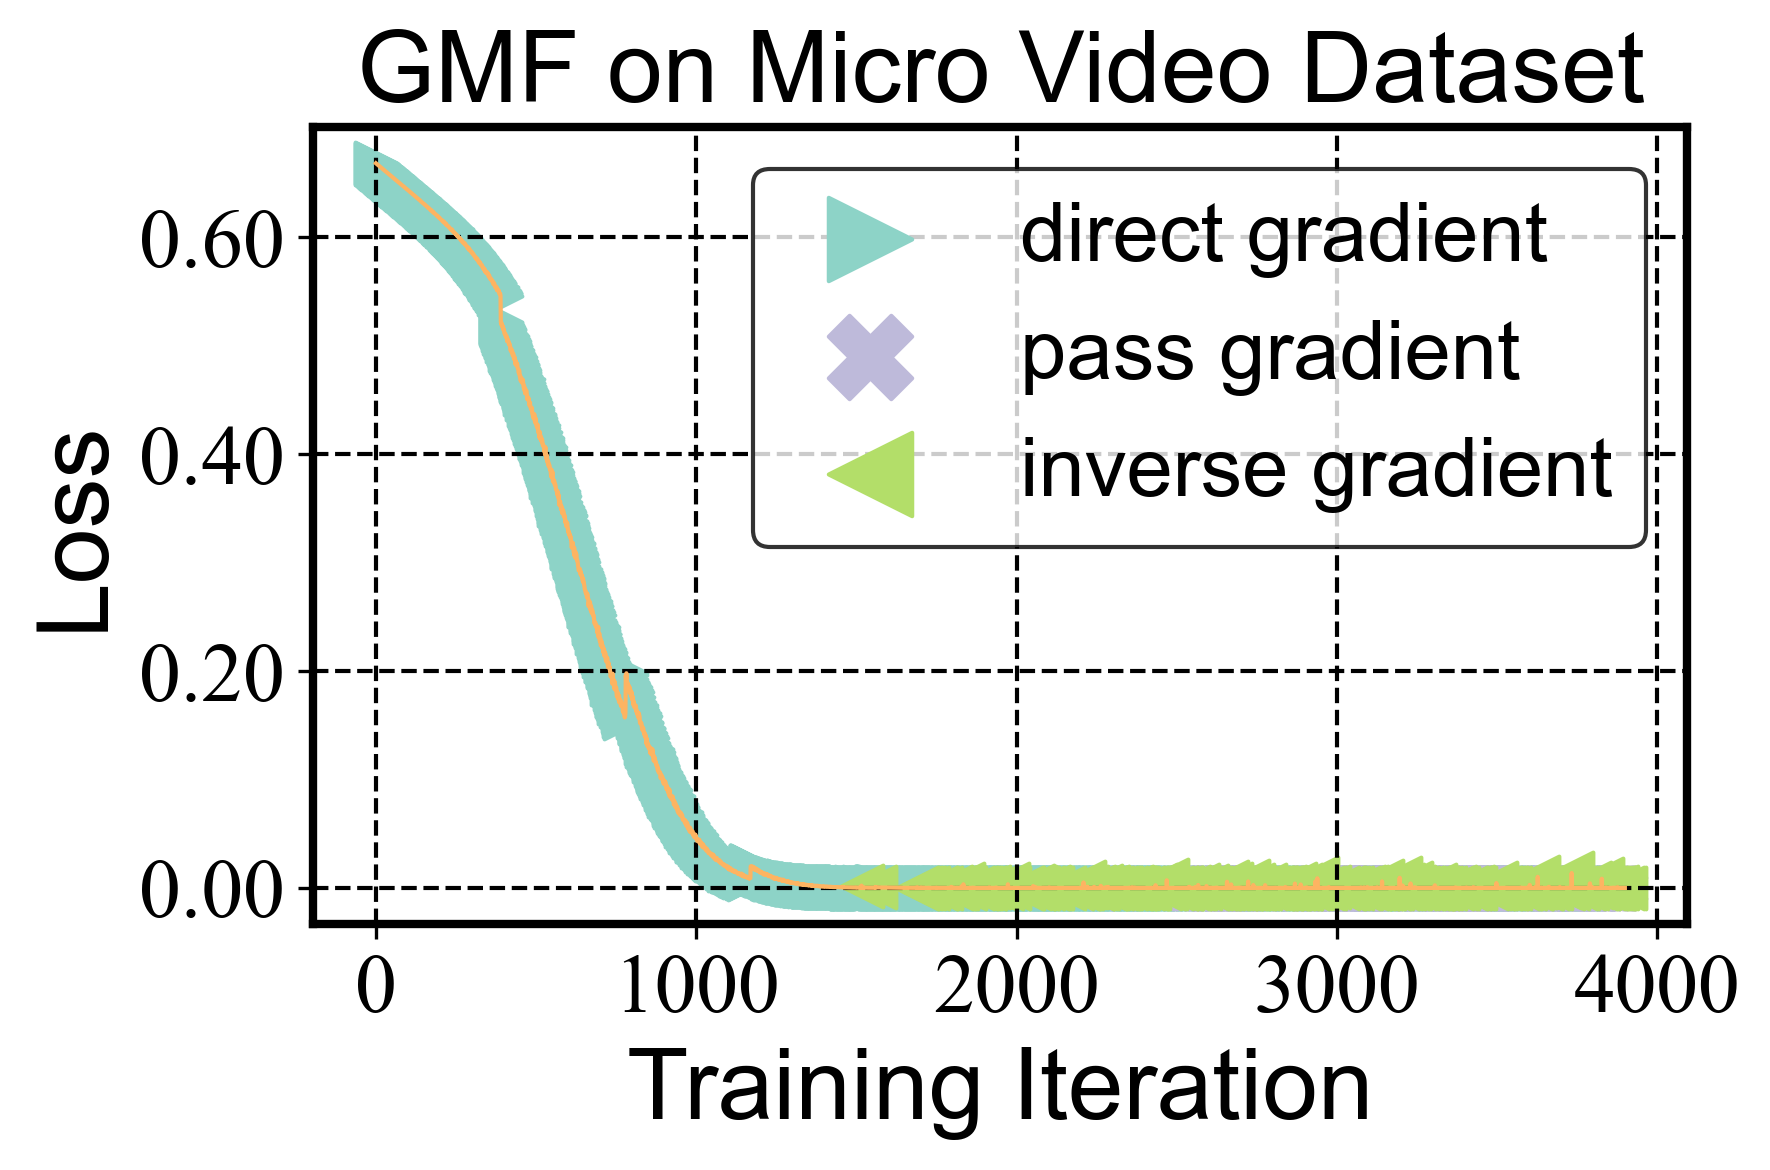

In [97]:
# print(posWeights)
from matplotlib.lines import Line2D  # for legend handle
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib
plt.rcParams['font.sans-serif'] = ['Times New Roman']
font = 'arial'
plt.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
# figure, ax = plt.subplots()
f, ax = plt.subplots(figsize=(6,4))
# f.patch.set_alpha(0.)
# palette = sns.color_palette("bright", 1)
# sns.set_style("white")

font3 = {'family': font,
         'weight': 'normal',
         'size': 20,
         }
font1 = {'family': font,
    'weight': 'normal',
    'size': 24,
    }   
# font1 = {'family': font,
#          'weight': 'normal',
#         'size': 24,
#          }

# font3 = {'family': font,
#          'weight': 'normal',
#          'size': 24,
#          }

# sns.set(rc={'figure.figsize':(15,15)})

# colors = ['red', 'green', 'blue']
# markers = ['>', 'v', '<']
ax.scatter(iter_direct, direct, marker='>', s = 100, c = '#8dd3c7',label='direct gradient')
ax.scatter(iter_mid, mid, marker='X', s = 100, c = '#bebada',label='pass gradient')
ax.scatter(iter_inverse, inverse, marker='<', s = 100, c = '#b3de69',label='inverse gradient')
plt.legend(prop=font3, loc='upper right', markerscale=2, ncol=1, fancybox=True, edgecolor='black', framealpha=0.8)

# ax.scatter(iter, loss_list, marker='>', c = [colors[label_list[i]] for i in iter],label='direct')


pl.plot(iter, loss_list, linestyle='-', color='#fdb462', lw=1, ms=9, markerfacecolor='none', mew=2)
# plt.xticks(iter)

plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.tick_params(labelsize=20)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]


# plt.legend(prop=font3, loc='upper right', markerscale=2, ncol=1, fancybox=True, edgecolor='black', framealpha=0.8)
plt.grid(color = 'black',linestyle='--',linewidth = 1)
plt.ylabel('Loss', font1)
plt.xlabel('Training Iteration', font1)
plt.title('GMF on Micro Video Dataset', font1)
plt.tight_layout()
bwith = 2
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)

hist_fig = ax.get_figure()
hist_fig.savefig("loss_GMF_kuaishou_50.pdf", dpi = 400)
plt.show()